## 시각화: 분포(distribution)
### 복습
- 미디어 패널의 인구통계학적 분포: 성별, 연령, 거주지 분포는 어떠한가?

### 질문하기: 온라인 콘텐츠
1. 온라인 디지털 콘텐츠를 얼마나 구매하는가?
2. 온라인 디지털 콘텐츠 지출금액의 분포는 어떠한가? 
3. 온라인 디지털 콘텐츠를 구매하는 사람들은 누구인가?

**편의상 가중치는 고려하지 않고 실습을 진행합니다.

In [1]:
from pandas import Series, DataFrame 
import pandas as pd
import numpy as np

pd.__version__ 

'1.0.5'

In [2]:
url = "https://raw.githubusercontent.com/eunyu1031/Media_interface_2020Spr/master/data/p19_mediapanel.csv"

data = pd.read_csv(url, encoding = 'utf-8')
data.head()

,pid,hid,area,area_siz,hhld_siz,fly_typ,gender,byear,age_gr,age,...,news_med1,news_med2,news_med3,news_plat1,news_plat2,news_plat3,channel,shop,shop_dev,shop_pay
0,10001,100,1,1,3,3,1,1967,6,52,...,3,4,,3,2,,1,1,1,2
1,10002,100,1,1,3,3,2,1972,5,47,...,3,4,,3,2,,3,1,1,2
2,20001,200,1,1,3,3,1,1965,6,54,...,4,,,3,,,7,,,
3,30001,300,8,1,3,3,1,1971,5,48,...,3,,,3,,,1,,,
4,30002,300,8,1,3,3,2,1974,5,45,...,,,,,,,1,1,3,1


지난 시간에는 인구통계학적 정보를 확인했습니다.

In [3]:
demo = data.iloc[:, :15]
demo

,pid,hid,area,area_siz,hhld_siz,fly_typ,gender,byear,age_gr,age,marry,income_gr,job,job_type,job_etc
0,10001,100,1,1,3,3,1,1967,6,52,2,11,1,2,
1,10002,100,1,1,3,3,2,1972,5,47,2,1,2,,2
2,20001,200,1,1,3,3,1,1965,6,54,2,11,1,1,
3,30001,300,8,1,3,3,1,1971,5,48,2,9,1,1,
4,30002,300,8,1,3,3,2,1974,5,45,2,1,2,,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10859,118290002,1182900,16,1,3,3,1,1983,4,36,2,6,1,1,
10860,118300001,1183000,16,1,2,3,1,1995,3,24,1,5,1,1,
10861,118310001,1183100,16,1,1,1,2,1939,8,80,3,1,2,,2
10862,118320001,1183200,16,1,1,1,2,1940,8,79,3,1,2,,2


DataFrame 'demo'에서 각 열(column)의 의미는 아래와 같습니다.

<table>
<thead>
<tr>
<td width="91">
<p>Original</p>
</td>
<td width="97">
<p>Cleaned</p>
</td>
<td width="210">
<p>Description</p>
</td>
<td>
<p>Detail</p>
</td>
</tr>
</thead>
<tbody>
<tr>
<td width="91">
<p>pid</p>
</td>
<td width="97">
<p><strong>pid</strong></p>
</td>
<td width="210">
<p>[개인정보] 개인 통합 ID</p>
</td>
<td>&nbsp;</td>
</tr>
<tr>
<td width="91">
<p>hid</p>
</td>
<td width="97">
<p><strong>hid</strong></p>
</td>
<td width="210">
<p>[개인정보] 가구 통합 ID</p>
</td>
<td>&nbsp;</td>
</tr>
<tr>
<td width="91">
<p>p__area</p>
</td>
<td width="97">
<p><strong>area</strong></p>
</td>
<td width="210">
<p>[개인정보] 지역</p>
</td>
<td>
<p>1) 서울 2) 부산 3) 대구 4) 인천 5) 광주 6) 대전 <br>
    7) 울산 8) 경기 9) 강원 10) 충북 11) 충남 12) 전북 <br>
    13) 전남 14) 경북 15) 경남 16) 제주 17) 세종</p>
</td>
</tr>
<tr>
<td width="91">
<p>p__area_siz</p>
</td>
<td width="97">
<p><strong>area_siz</strong></p>
</td>
<td width="210">
<p>[가구정보] 지역구분</p>
</td>
<td>
<p>① 시부 ② 군부</p>
</td>
</tr>
<tr>
<td width="91">
<p>p__hhldsiz</p>
</td>
<td width="97">
<p><strong>hhld_siz</strong></p>
</td>
<td width="210">
<p>[가구정보] 가구원 수</p>
</td>
<td>
<p>① 1인 가구 ② 2인 가구 ③ 3인 이상 가구</p>
</td>
</tr>
<tr>
<td width="91">
<p>p__fly_typ</p>
</td>
<td width="97">
<p><strong>fly_typ</strong></p>
</td>
<td width="210">
<p>[가구정보] 가족 구성</p>
</td>
<td>
<p>1) 1인가구 2) 1세대가구(부부) 3) 2세대가구(부부+자녀) <br>
    4) 3세대가구 (조부모+부부+자녀) 5) 기타</p>
</td>
</tr>
<tr>
<td width="91">
<p>p__gender</p>
</td>
<td width="97">
<p><strong>gender</strong></p>
</td>
<td width="210">
<p>[개인정보] 성별</p>
</td>
<td>
<p>1)남 2)여</p>
</td>
</tr>
<tr>
<td width="91">
<p>p__byear</p>
</td>
<td width="97">
<p><strong>byear</strong></p>
</td>
<td width="210">
<p>[개인정보] 출생연도</p>
</td>
<td>&nbsp;</td>
</tr>
<tr>
<td width="91">
<p>p__age</p>
</td>
<td width="97">
<p><strong>age_gr</strong></p>
</td>
<td width="210">
<p>[개인정보] 나이(리코드)</p>
</td>
<td>
<p>1) 만 10대 미만 2) 만 10-19세 3) 만 20-29세 4) 만 30-39세 <br>
    5) 만 40-49세 6) 만 50-59세 7) 만 60-69세 8) 만 70세 이상</p>
</td>
</tr>
<tr>
<td width="91">
<p>p__age1</p>
</td>
<td width="97">
<p><strong>age</strong></p>
</td>
<td width="210">
<p>[개인정보] 나이(만 연령)</p>
</td>
<td>&nbsp;</td>
</tr>
<tr>
<td width="91">
<p>p__mar</p>
</td>
<td width="97">
<p><strong>marry</strong></p>
</td>
<td width="210">
<p>[개인정보] 결혼 여부</p>
</td>
<td>
<p>① 미혼 ② 배우자 있음 ③ 사별 ④ 이혼</p>
</td>
</tr>
<tr>
<td width="91">
<p>p__income1</p>
</td>
<td width="97">
<p><strong>income_gr</strong></p>
</td>
<td width="210">
<p>[개인정보] 개인 월평균 소득</p>
</td>
<td>
<p>1) 소득 없음 2) 50만원 미만 3) 50-100만원 미만 4) 100-150만원 미만 <br>
    5) 150-200만원 미만 6) 200-250만원 미만 7) 250-300만원 미만 8) 300-350만원 미만  <br>
    9) 350-400만원 미만 10) 400-450만원 미만 11) 450-500만원 미만 12) 500-550만원 미만  <br>
    13) 550-600만원 미만 14) 600-650만원 미만 15) 650-700만원 미만 16) 700-750만원 미만  <br>
    17) 750-800만원 미만 18) 800만원 이상</p>
</td>
</tr>
<tr>
<td width="91">
<p>p__job1</p>
</td>
<td width="97">
<p><strong>job</strong></p>
</td>
<td width="210">
<p>[개인정보] 직업 유무</p>
</td>
<td>
<p>① 예 ② 아니오</p>
</td>
</tr>
<tr>
<td width="91">
<p>p__job2</p>
</td>
<td width="97">
<p><strong>job_type</strong></p>
</td>
<td width="210">
<p>[개인정보] 직업 종사상 지위</p>
</td>
<td>
<p>① 임금 근로자 ② 고용주(고용인이 있는 자영업자) <br>
    ③ 단독 자영업자(고용인이 없는 자영업자) ④ 무급 가족 종사자</p>
</td>
</tr>
<tr>
<td width="91">
<p>p__job4</p>
</td>
<td width="97">
<p><strong>job_etc</strong></p>
</td>
<td width="210">
<p>[개인정보] 무직 구분</p>
</td>
<td>
<p>① 학생 ② 전업주부 ③ 군인(직업군인 제외) ④ 기타/무직</p>
</td>
</tr>
</tbody>
</table>

In [4]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10864 entries, 0 to 10863
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pid        10864 non-null  int64 
 1   hid        10864 non-null  int64 
 2   area       10864 non-null  int64 
 3   area_siz   10864 non-null  int64 
 4   hhld_siz   10864 non-null  int64 
 5   fly_typ    10864 non-null  int64 
 6   gender     10864 non-null  int64 
 7   byear      10864 non-null  int64 
 8   age_gr     10864 non-null  int64 
 9   age        10864 non-null  int64 
 10  marry      10864 non-null  int64 
 11  income_gr  10864 non-null  int64 
 12  job        10864 non-null  int64 
 13  job_type   10864 non-null  object
 14  job_etc    10864 non-null  object
dtypes: int64(13), object(2)
memory usage: 1.2+ MB


In [5]:
demo.describe()

,pid,hid,area,area_siz,hhld_siz,fly_typ,gender,byear,age_gr,age,marry,income_gr,job
count,1.086400e+04,1.086400e+04,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000
mean,5.003951e+07,5.003950e+05,7.299521,1.094532,2.655284,2.835144,1.541053,1971.873711,5.196705,47.126289,1.820508,3.999172,1.465022
std,3.767155e+07,3.767155e+05,4.592933,0.292581,0.598260,0.780984,0.498335,20.679911,1.985370,20.679911,0.661259,3.204540,0.498798
min,1.000100e+04,1.000000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,1915.000000,1.000000,6.000000,1.000000,1.000000,1.000000
25%,1.640250e+07,1.640250e+05,3.000000,1.000000,2.000000,3.000000,1.000000,1957.000000,4.000000,30.000000,1.000000,1.000000,1.000000
50%,5.170000e+07,5.170000e+05,8.000000,1.000000,3.000000,3.000000,2.000000,1970.000000,5.000000,49.000000,2.000000,3.000000,1.000000
75%,6.890000e+07,6.890000e+05,11.000000,1.000000,3.000000,3.000000,2.000000,1989.000000,7.000000,62.000000,2.000000,6.000000,2.000000
max,1.183300e+08,1.183300e+06,17.000000,2.000000,3.000000,5.000000,2.000000,2013.000000,8.000000,104.000000,4.000000,18.000000,2.000000


In [6]:
demo.nunique()

pid          10864
hid           4583
area            17
area_siz         2
hhld_siz         3
fly_typ          5
gender           2
byear           96
age_gr           8
age             96
marry            4
income_gr       18
job              2
job_type         5
job_etc          5
dtype: int64

성별을 나타내는 'gender'는 남성은 1, 여성은 2로 나타낸 범주형(이진형) 변수입니다. 히스토그램(도수분포표)로 살펴볼 수 있습니다.

In [7]:
demo['gender'].value_counts()

2    5878
1    4986
Name: gender, dtype: int64

In [8]:
demo['gender'].value_counts(normalize = True)

2    0.541053
1    0.458947
Name: gender, dtype: float64

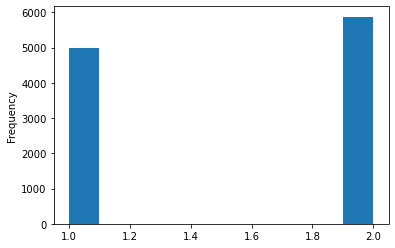

In [9]:
demo['gender'].plot.hist()

연령대를 나타내는 'age_gr'은 연령을 나타내는 숫자형 변수 'age'를 범주형(순서형)으로 바꾼 파생변수입니다.  범주룰 구분할 뿐 숫자 자체에 의미가 없으므로 평균이나 중앙값보다는 최빈값이 중요합니다.

In [10]:
demo['age_gr'].value_counts().sort_index()

1     214
2    1194
3    1225
4    1028
5    1980
6    2107
7    1402
8    1714
Name: age_gr, dtype: int64

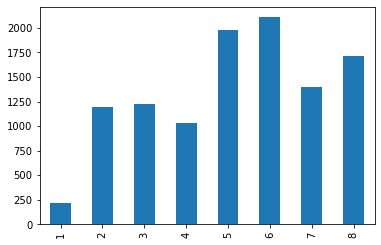

In [11]:
# value_counts의 막대그래프이므로 히스토그램이나 다름없음
demo['age_gr'].value_counts().sort_index().plot.bar() 

만 나이를 나타내는 'age'는 숫자형 변수이며, 박스플롯(box plot)을 사용하여 사분위수를 비롯한 전반적인 분포를 살펴볼 수 있습니다. 

<img src='https://github.com/eunyu1031/Media_interface_2020Spr/blob/master/pics/boxplot.png?raw=true'/>

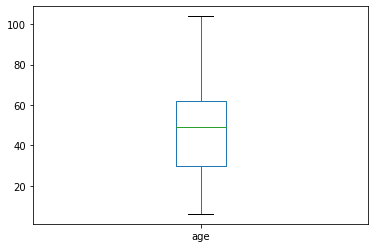

In [12]:
demo['age'].plot.box()

물론 히스토그램으로도 살펴볼 수 있습니다, bins로는 연속된 값을 몇 개로 구분하여 살펴볼지를 지정합니다.

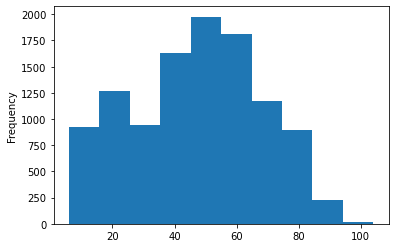

In [13]:
demo['age'].plot.hist(bins = 10)

In [15]:
help(DataFrame.plot)

pandas의 plot은 가장 간편하게 데이터를 시각화할 수 있는 도구입니다. plot.hist, plot.box를 사용하여 온라인 디지털 콘텐츠의 소비에 대한 질문들을 탐색해 봅시다.

### 질문하기: 온라인 콘텐츠
1. 온라인 디지털 콘텐츠를 얼마나 구매하는가?
2. 온라인 디지털 콘텐츠 지출금액의 분포는 어떠한가? 
3. 온라인 디지털 콘텐츠를 구매하는 사람들은 누구인가?

질문을 해결하기 전에 아래와 같이 데이터를 처리할 필요가 있습니다.
- (1) 없는 응답 처리
- (2) 자료형 바꾸기

자세한 사항은 다음 기회에 설명하고, 데이터의 문제를 발견하고 처리하는 과정을 살펴봅니다.

In [16]:
data['c01'].unique()

array([' ', '0', '1', '6', '15', '3', '10', '5', '2', '13', '20', '12',
       '14', '50', '30', '100', '4', '8', '80', '22', '42'], dtype=object)

In [17]:
data['c01_gr'].unique()

array([' ', '1', '2', '4', '3', '5', '8', '7'], dtype=object)

In [18]:
data.iloc[:,19:29].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10864 entries, 0 to 10863
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   c01     10864 non-null  object
 1   c01_gr  10864 non-null  object
 2   c02     10864 non-null  object
 3   c02_gr  10864 non-null  object
 4   c03     10864 non-null  object
 5   c03_gr  10864 non-null  object
 6   c04     10864 non-null  object
 7   c04_gr  10864 non-null  object
 8   c05     10864 non-null  object
 9   c05_gr  10864 non-null  object
dtypes: object(10)
memory usage: 848.9+ KB


응답하지 않은 사람(' ')을 NaN, 즉 없는 데이터로 처리하고 숫자로 바꾼 다음(to_numeric), 구매하지 않은 사람('0') 역시 NaN으로 바꿉니다(replace). DataFrame에서는 NaN으로 표시되지만 코드에는 np.nan으로 씁니다. 범위의 모든 열에 작업을 수행한(apply) 다음 다른 열들에 붙입니다(concat).

In [7]:
purchase = pd.concat([data.iloc[:, [0, 6, 8, 9]], 
                      data.iloc[:,19:29].apply(lambda x: pd.to_numeric(x, errors = 'coerce').replace(0,np.nan))], 
                     axis = 1)
purchase.head()

,pid,gender,age_gr,age,c01,c01_gr,c02,c02_gr,c03,c03_gr,c04,c04_gr,c05,c05_gr
0,10001,1,6,52,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1,10002,2,5,47,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
2,20001,1,6,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30001,1,5,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,30002,2,5,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<table>
<thead>
<tr>
<td width="82">
<p>Original</p>
</td>
<td width="83">
<p>Cleaned</p>
</td>
<td>
<p>[방송통신 서비스 가입 및 지출] 온라인 디지털 콘텐츠 지출</p>
</td>
</tr>
</thead>
<tbody>
<tr>
<td width="82">
<p>p__c05001</p>
</td>
<td width="83">
<p><strong>c01</strong></p>
</td>
<td>
<p>월평균 지출금액 - 온라인 뉴스/잡지/E-book(웹툰/웹소설 포함)</p>
</td>
</tr>
<tr>
<td width="82">
<p>p__c05002</p>
</td>
<td width="83">
<p><strong>c01_gr</strong></p>
</td>
<td>
<p>월평균 지출금액 - 온라인 뉴스/잡지/E-book(웹툰/웹소설 포함)(리코드)</p>
</td>
</tr>
<tr>
<td width="82">
<p>p__c05003</p>
</td>
<td width="83">
<p><strong>c02</strong></p>
</td>
<td>
<p>월평균 지출금액 - 동영상/영화</p>
</td>
</tr>
<tr>
<td width="82">
<p>p__c05004</p>
</td>
<td width="83">
<p><strong>c02_gr</strong></p>
</td>
<td>
<p>월평균 지출금액 - 동영상/영화(리코드)</p>
</td>
</tr>
<tr>
<td width="82">
<p>p__c05005</p>
</td>
<td width="83">
<p><strong>c03</strong></p>
</td>
<td>
<p>월평균 지출금액 - TV 방송 프로그램</p>
</td>
</tr>
<tr>
<td width="82">
<p>p__c05006</p>
</td>
<td width="83">
<p><strong>c03_gr</strong></p>
</td>
<td>
<p>월평균 지출금액 - TV 방송 프로그램(리코드)</p>
</td>
</tr>
<tr>
<td width="82">
<p>p__c05007</p>
</td>
<td width="83">
<p><strong>c04</strong></p>
</td>
<td>
<p>월평균 지출금액 - 음악</p>
</td>
</tr>
<tr>
<td width="82">
<p>p__c05008</p>
</td>
<td width="83">
<p><strong>c04_gr</strong></p>
</td>
<td>
<p>월평균 지출금액 - 음악(리코드)</p>
</td>
</tr>
<tr>
<td width="82">
<p>p__c05009</p>
</td>
<td width="83">
<p><strong>c05</strong></p>
</td>
<td>
<p>월평균 지출금액 - 게임</p>
</td>
</tr>
<tr>
<td width="82">
<p>p__c05010</p>
</td>
<td width="83">
<p><strong>c05_gr</strong></p>
</td>
<td>
<p>월평균 지출금액 - 게임(리코드)</p>
</td>
</tr>
</tbody>
</table>

리코드: (1) 5천원 미만 (2) 5천원 - 1만원 미만 (3) 1만원 - 1만 5천원 미만 (4) 1만 5천원 - 2만원 미만 (5) 2만원 - 2만 5천원 미만 (6) 2만 5천원 - 3만원 미만 (7) 3만원 - 3만 5천원 미만 (8) 3만 5천원 이상 (9999) 모름/ 무응답

<img src='https://github.com/eunyu1031/Media_interface_2020Spr/blob/master/pics/OnlineDigitalContent.png?raw=true' width='600'/>

DataFrame 'purchase'로 분포에 대한 질문들을 탐색해 봅시다.

#### 1. 온라인 디지털 콘텐츠를 얼마나 구매하는가?

지출금액은 실제로 지출한 사람을(0인 사람을 NaN처리했으므로), 리코드는 지출하지는 않아도 서비스를 사용하는 사람을 나타냅니다. 10000명이 넘는 사람 중 아주 일부만 실제로 지출하는 것을 확인할 수 있습니다. 음악에 지출하는 사람이 그래도 가장 많습니다.

In [8]:
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10864 entries, 0 to 10863
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pid     10864 non-null  int64  
 1   gender  10864 non-null  int64  
 2   age_gr  10864 non-null  int64  
 3   age     10864 non-null  int64  
 4   c01     121 non-null    float64
 5   c01_gr  1647 non-null   float64
 6   c02     258 non-null    float64
 7   c02_gr  2038 non-null   float64
 8   c03     257 non-null    float64
 9   c03_gr  1275 non-null   float64
 10  c04     622 non-null    float64
 11  c04_gr  1833 non-null   float64
 12  c05     203 non-null    float64
 13  c05_gr  1550 non-null   float64
dtypes: float64(10), int64(4)
memory usage: 1.2 MB


최대값(max)를 확인했을 때 9999는 없으며, 2019년도 데이터의 경우 모두 수집시에 NaN 처리된 것으로 보입니다.

In [9]:
purchase.describe()

,pid,gender,age_gr,age,c01,c01_gr,c02,c02_gr,c03,c03_gr,c04,c04_gr,c05,c05_gr
count,1.086400e+04,10864.000000,10864.000000,10864.000000,121.000000,1647.000000,258.000000,2038.000000,257.000000,1275.000000,622.000000,1833.000000,203.000000,1550.000000
mean,5.003951e+07,1.541053,5.196705,47.126289,12.644628,1.149970,9.736434,1.200196,11.638132,1.402353,7.778135,1.414075,13.650246,1.280000
std,3.767155e+07,0.498335,1.985370,20.679911,15.626292,0.713503,14.885827,0.693019,9.381945,1.091063,5.472134,0.776538,16.651074,1.011388
min,1.000100e+04,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.640250e+07,1.000000,4.000000,30.000000,5.000000,1.000000,5.000000,1.000000,6.000000,1.000000,5.000000,1.000000,5.000000,1.000000
50%,5.170000e+07,2.000000,5.000000,49.000000,10.000000,1.000000,9.000000,1.000000,10.000000,1.000000,8.000000,1.000000,10.000000,1.000000
75%,6.890000e+07,2.000000,7.000000,62.000000,13.000000,1.000000,10.000000,1.000000,12.000000,1.000000,10.000000,2.000000,11.500000,1.000000
max,1.183300e+08,2.000000,8.000000,104.000000,100.000000,8.000000,200.000000,8.000000,65.000000,8.000000,80.000000,8.000000,102.000000,8.000000


평균을 살펴보면 온라인 뉴스/잡지/E-book(웹툰/웹소설 포함)에 약 12,645원, 동영상/영화에는 9,736원, TV방송프로그램에는 11,638월, 음악에는 7,778원, 게임에는 13,650원을 한 달에 지출합니다.

숫자형 변수들의 중앙값(50%)이 평균보다 작아 돈을 많이 지불하는 것은 소수임을 알 수 있으며, 범주형 변수들의 중앙값은 1에 불과해 절반 이상이 5천원 미만으로 돈을 지불한다는 점을 알 수 있습니다.

In [10]:
purchase.describe().iloc[[1,5], 4:]

,c01,c01_gr,c02,c02_gr,c03,c03_gr,c04,c04_gr,c05,c05_gr
mean,12.644628,1.14997,9.736434,1.200196,11.638132,1.402353,7.778135,1.414075,13.650246,1.28
50%,10.000000,1.00000,9.000000,1.000000,10.000000,1.000000,8.000000,1.000000,10.000000,1.00



<img src='https://github.com/eunyu1031/Media_interface_2020Spr/blob/master/pics/skewness.png?raw=true' width='400'/>

#### 2. 온라인 디지털 콘텐츠 지출금액의 분포는 어떠한가? 

온라인 뉴스/잡지/E-book(웹툰/웹소설 포함)(c01)의 예제로 살펴봅니다. 

plot을 사용하면 NaN은 제외하고 있는 데이터로만 그래프를 그립니다.

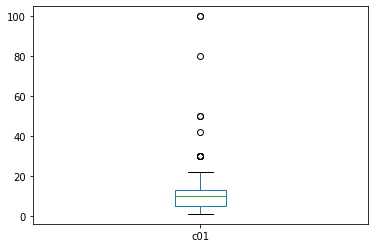

In [11]:
purchase['c01'].plot.box()

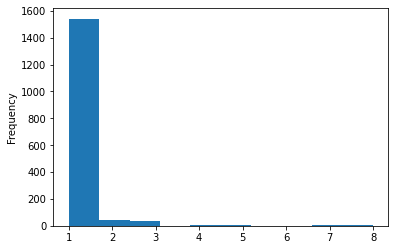

In [12]:
purchase['c01_gr'].plot.hist()

대부분이 무료로 온라인 뉴스/잡지/E-book(웹툰/웹소설 포함)서비스를 이용하지만, 소수의 인원이 큰 돈을 지불하여 콘텐츠를 이용하는 것을 볼 수 있습니다.

#### 3. 온라인 디지털 콘텐츠를 구매하는 사람들은 누구인가?

게임(c05)의 예제로 성별과 연령대를 살펴봅니다. 

성별과 연령대에는 NaN이 없기 때문에 게임 콘텐츠에 돈을 지불하는 사람을 기준으로 골라낼 필요가 있으며, notna()를 사용해 boolean indexing을 하면 가능합니다.

In [13]:
purchase['c05'].notna()

0        False
1        False
2        False
3        False
4        False
         ...  
10859    False
10860    False
10861    False
10862    False
10863    False
Name: c05, Length: 10864, dtype: bool

In [14]:
purchase[purchase['c05'].notna()]

,pid,gender,age_gr,age,c01,c01_gr,c02,c02_gr,c03,c03_gr,c04,c04_gr,c05,c05_gr
26,120004,2,3,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,4.0
200,1010004,2,2,10,NaN,NaN,9.0,2.0,NaN,NaN,7.0,2.0,3.0,1.0
226,1180001,1,5,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,5.0
234,1210004,1,3,28,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,5.0,2.0
247,1290003,1,3,29,6.0,2.0,NaN,NaN,NaN,NaN,3.0,1.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10643,116500001,1,5,42,NaN,NaN,10.0,3.0,NaN,NaN,NaN,NaN,8.0,2.0
10647,116510001,1,4,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,2.0
10651,116520001,1,4,35,NaN,NaN,10.0,3.0,NaN,NaN,NaN,NaN,8.0,2.0
10655,116530001,1,4,35,NaN,NaN,20.0,5.0,NaN,NaN,8.0,2.0,8.0,2.0


In [15]:
purchase[purchase['c05'].notna()]['gender']

26       2
200      2
226      1
234      1
247      1
        ..
10643    1
10647    1
10651    1
10655    1
10823    1
Name: gender, Length: 203, dtype: int64

위 값을 바탕으로 히스토그랩을 그립니다.

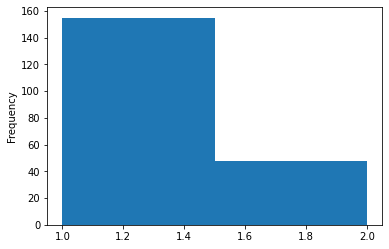

In [37]:
purchase[purchase['c05'].notna()]['gender'].plot.hist(bins = 2)

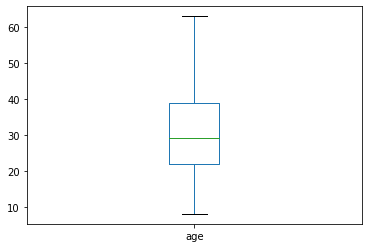

In [17]:
purchase[purchase['c05'].notna()]['age'].plot.box()

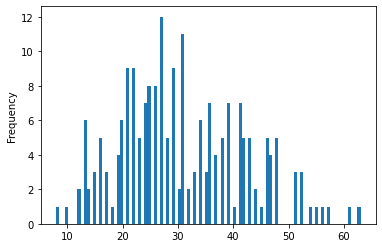

In [18]:
purchase[purchase['c05'].notna()]['age'].plot.hist(bins = 100)

게임 콘텐츠의 구매자는 여성보다는 남성이 더 많으며, 연령대는 다양하게 분포하나 20-30대에 많은 것을 볼 수 있습니다.

<p style="color:#0000FF";><font size = "5"><b>
 # 연습하기
    </b></font></p>
    
#### 동영상/영화, TV방송프로그램, 음악 온라인 콘텐츠 소비에 대해 아래 질문들의 답을 탐색해 보세요.

2. 온라인 디지털 콘텐츠 지출금액의 분포는 어떠한가? 
3. 온라인 디지털 콘텐츠를 구매하는 사람들은 누구인가?

필요하다면 DataFrame 'data'에서 소득 등 다른 정보를 가져와 더 탐색해 보세요.

다음 시간부터 본격적으로 질문에 따라 시각화 패키지를 사용해 다양한 차트를 그려봅니다.

In [38]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Age distribution')

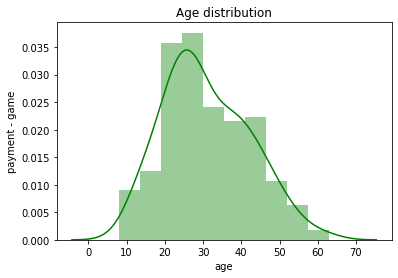

In [39]:
sns.distplot(purchase[purchase['c05'].notna()]['age'], color = 'green')
plt.xlabel("age")
plt.ylabel("payment - game")
plt.title("Age distribution")

In [0]:
sns.violinplot(x = 'gender', y = 'c05', data = purchase)

In [0]:
sns.set_palette("bright")
sns.boxplot(x = 'age_gr', y = 'c05', data = purchase)